### **Sobre o conjunto de dados**
Diabetes é uma condição causada por problemas na produção ou na absorção de insulina, um tipo de hormônio produzido pelo pâncreas que ajuda o corpo nos processos de quebra da glicose para permitir que tenhamos energia para manter o organismo funcionando.

Essa condição é considerada uma síndrome metabólica porque a insulina também atua nos processos de geração de proteínas e lipídios que irão constituir o corpo humano.

O nome formal dessa condição é diabetes mellitus, sendo que existem diferentes tipos de diabetes, separados em níveis variados.


Através do conjuntos de dados disponibilizado pelo Instituto Nacional de Diabetes e Doenças Digestivas e Renais, vamos prever diagnóstico de pacientes que tem ou não diabetes, com base em certas medidas de diagnóstico incluídas no conjunto de dados. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de ascendência indígena Pima.




*   **Pregnancis :** Número de vezes que ficou grávida
*   **Glucose :** Concentração de glicose plasmática a 2 horas em um teste oral de tolerância à glicose
*   **BloodPressure :** Pressão arterial diastólica (mm Hg)
*    **SkinThickness :** Espessura da dobra cutânea do tríceps (mm)
*    **Insulin :** Insulina sérica de 2 horas (mu U/ml)
*    **BMI :** Índice de massa corporal (peso em kg/(altura em m)^2)
*    **DiabetesPedigreeFunction :** Função hereditária do diabetes
*    **Age :** idade
*    **Outcome :** Variável de classe (0 ou 1) 268 de 768 são 1, as outras são 0


In [1]:
#Importação das bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.feature_selection import SelectKBest, chi2






from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score 

#teste
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier



### **Analise Exploratória dos Dados**

In [2]:
arquivo=('/content/pima-data.csv')
coluna=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data=pd.read_csv(arquivo,names=coluna)

In [3]:
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* É possível identificar que não existem valores 
faltantes no conjunto de dados e a tipificação está correspondente.  


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
data.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


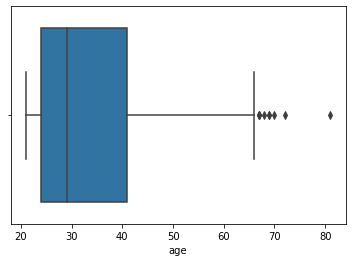

In [7]:
sns.boxplot(data['age'])

In [8]:
data_novo=data[data['age'].values<66]
data_novo=data[(data['pres'].values>39) & (data['pres'].values<106)]
data_novo=data[data['preg'].values<13]
data_novo=data[data['plas'].values>40]
data_novo=data[(data['mass'].values>18)& (data['mass'].values<50)]
data_novo=data[data['skin'].values<70]
data_novo=data[data['pedi'].values<1.0]
data_novo=data[data['test'].values<270]




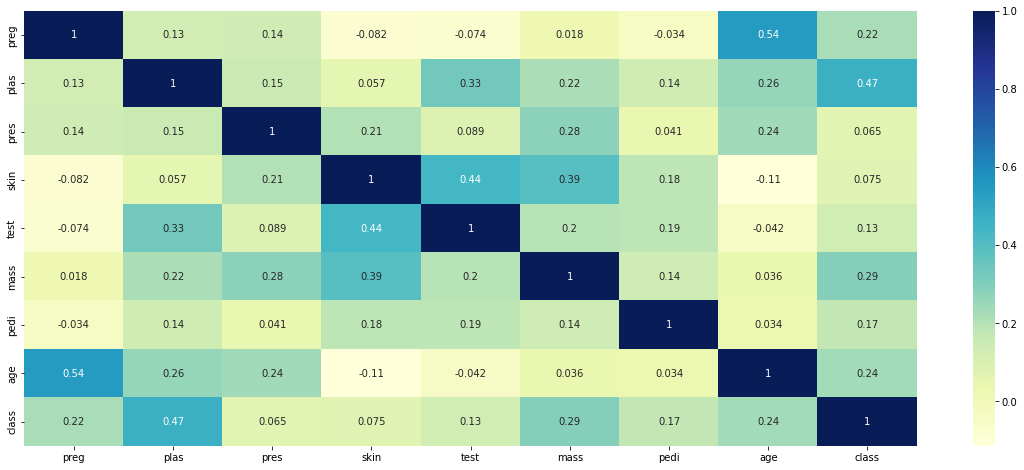

In [9]:
#Verificando a correlaçao das colunas
plt.figure(figsize = (20,8))
sns.heatmap(data.corr(),cmap='YlGnBu',annot = True);


Existem uma correlação positiva entre as seguintes colunas:
*  **age:** idade
*  **mass :** Índice de massa corporal (peso em kg/(altura em m)^2)
*  **plas:** Concentração de glicose plasmática a 2 horas em um teste oral de tolerância à glicose
* **preg:** Número de vezes que ficou grávida 

In [10]:
col = list(data.columns)
categorias = []
numerica = []
for i in col:
    if len(data[i].unique()) > 6:
        numerica.append(i)
    else:
        categorias.append(i)

print('Dados categoricos:',categorias)
print('Dados numericos :',numerica)


Dados categoricos: ['class']
Dados numericos : ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

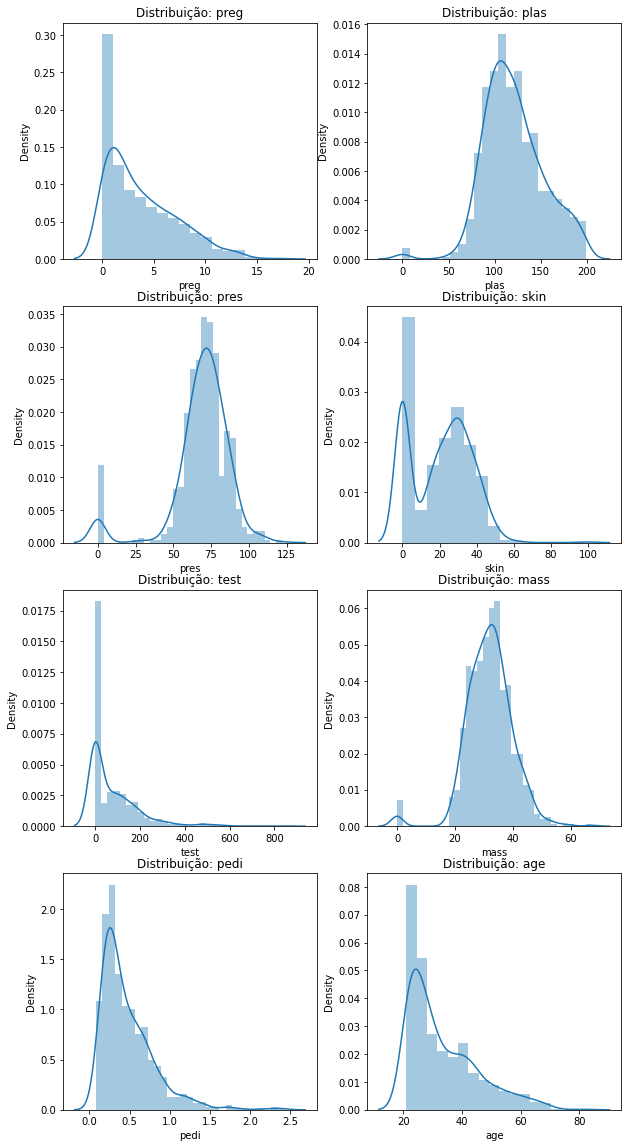

In [11]:

fig, ax = plt.subplots(nrows = 4,ncols = 2,figsize = (10,20))
for i in range(len(numerica)):
    plt.subplot(4,2,i+1)
    sns.distplot(data[numerica[i]])
    title = 'Distribuição: ' + numerica[i]
    plt.title(title)
plt.show()


* Tendo em vista que cada **features** está em uma escala diferente, será necessário a normalização dos dados antes de iniciar a modelagem.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


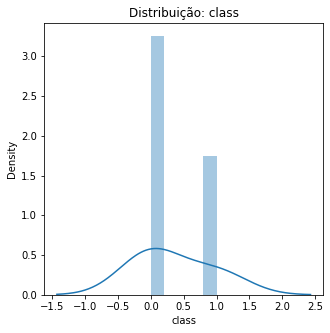

In [12]:
plt.figure(figsize = (5,5))
sns.distplot(data[categorias[0]],kde_kws = {'bw' : 1});
title = 'Distribuição: ' + categorias[0]
plt.title(title);

plt.show()

* Aqui verificamos que a **target** (class) está desbalanceada, será necessário a correção para que o modelo não fique tendencioso. 

### **Pré-processamento dos dados**

In [13]:
#Separando as features da target
x=data_novo.values[:,:-1]
y=data_novo.values[:,-1]

In [14]:
X_new = SelectKBest(chi2, k=7).fit_transform(x, y)
X_new.shape,y.shape


((716, 7), (716,))

In [15]:
#Tratando os dados desbalanceados
sm = SMOTE()
X,y_new = sm.fit_resample(X_new,y)  
X.shape,y_new.shape

((952, 7), (952,))

In [16]:
#Transformando os dados para a mesma escala (entre 0 e 1)
# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler()
rescaledX = scaler.fit_transform(X)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX,y_new,train_size=0.86,random_state=60)


In [18]:
model_terceiro_new = RandomForestClassifier(n_estimators= 20000,max_depth=29,random_state=60)
model_terceiro_new.fit(X_train,y_train)
y_terceiro=model_terceiro_new.predict(X_test)

In [19]:

terceiro_modelo=confusion_matrix(y_test,y_terceiro)
terceiro_modelo_=precision_score(y_test,y_terceiro)
print(terceiro_modelo_)

0.9206349206349206


In [20]:
accuracy=accuracy_score(y_test,y_terceiro)

In [21]:
print("Acurácia RandomForestClassifier: %.2f%%\n" % (accuracy * 100.0))
print("Precisao RandomForestClassifier: %.2f%%" % (terceiro_modelo_ * 100.0))

Acurácia RandomForestClassifier: 87.31%

Precisao RandomForestClassifier: 92.06%
